# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

# 1. Import data

In [77]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
# Display the first few rows of the DataFrame
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Visualizing the data distribution of glucose

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from HyperclassifierSearch import HyperclassifierSearch
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

C:\Users\QKmd\AppData\Local\Temp\ipykernel_33192\1642283737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])


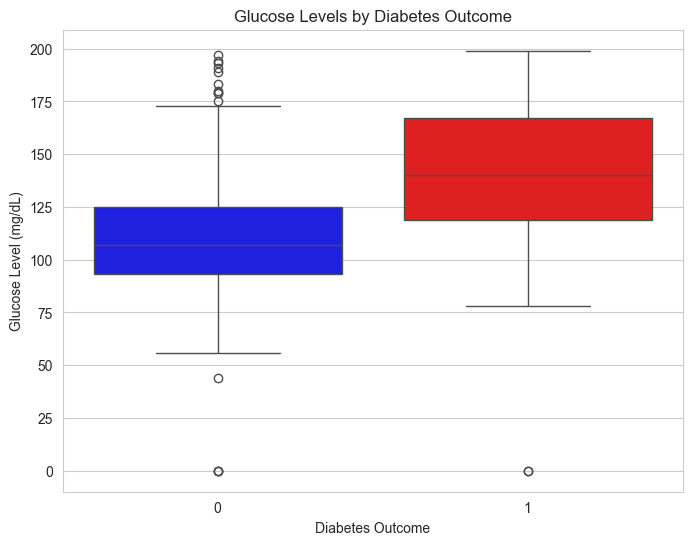

In [79]:
# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


#### Visualizing the age distribution

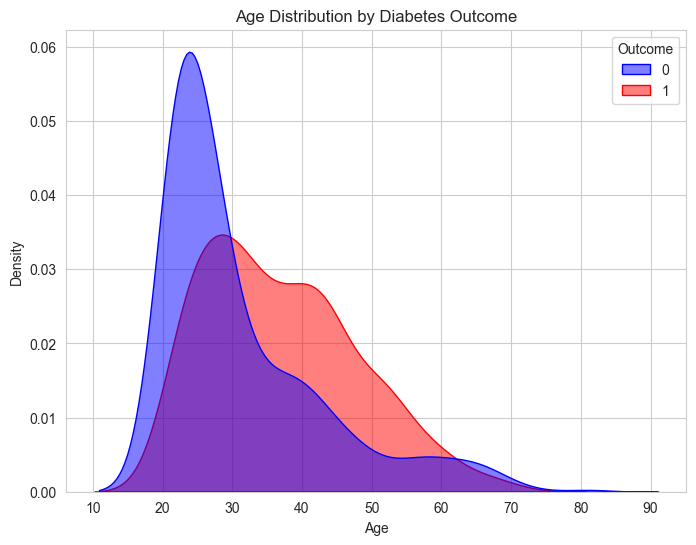

In [80]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


## 💪 Competition challenge

In this challenge, you will focus on the following key tasks:

- Determine the most important factors affecting the diabetes outcome.
- Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.
- What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

# 2. Data preprocessing

In [81]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
# Check for nan
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
# Check for duplicate rows
data.duplicated().sum()

0

In [84]:
# Summary statistics
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

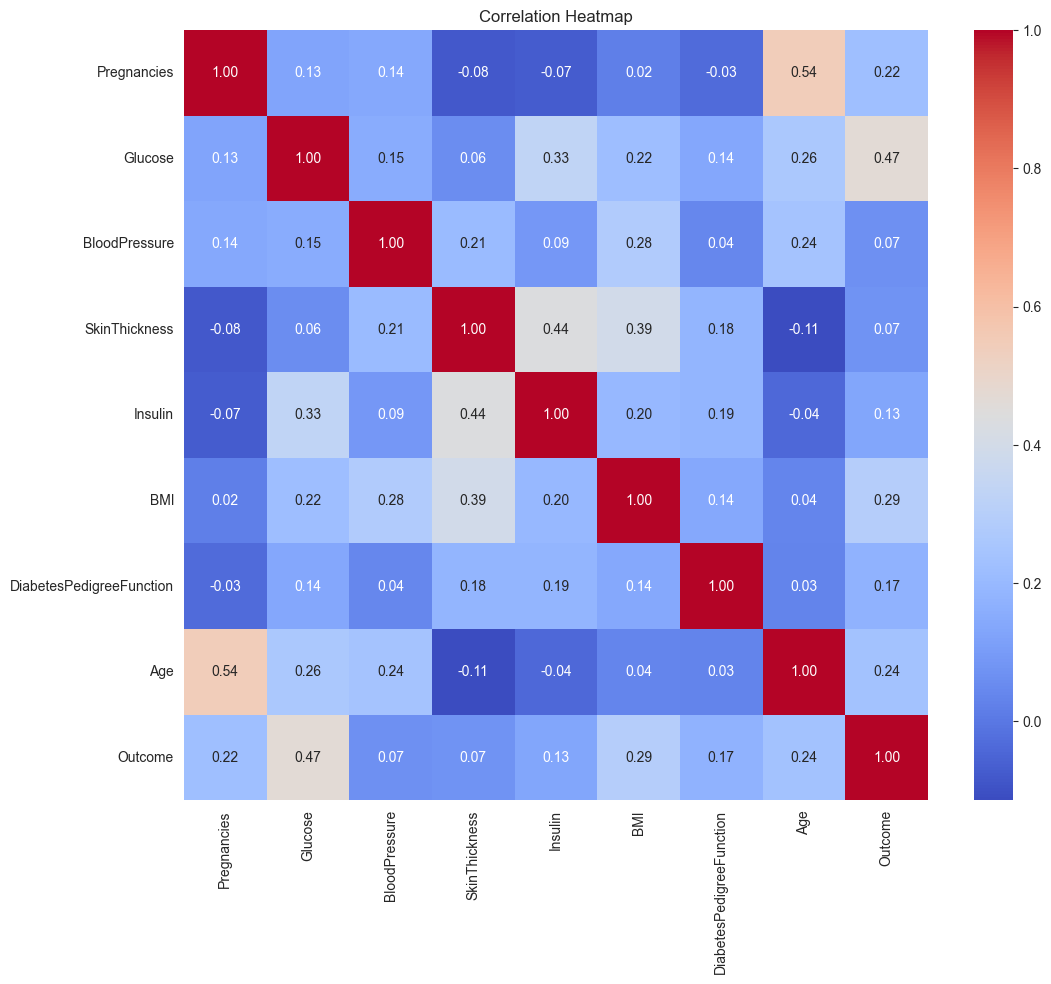

In [85]:
# Correlation matrix
corr_matrix = data.corr()
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [87]:
# Profile Report
profile = ProfileReport(data, title="Diabetes Profile Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
# Univariate Analysis histograms and boxplots
def plot_univariate(data, column):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data[column], kde=True, ax=ax[0])
    ax[0].set_title(f'{column} Distribution')
    sns.boxplot(data[column], ax=ax[1])
    ax[1].set_title(f'{column} Boxplot')
    plt.show()

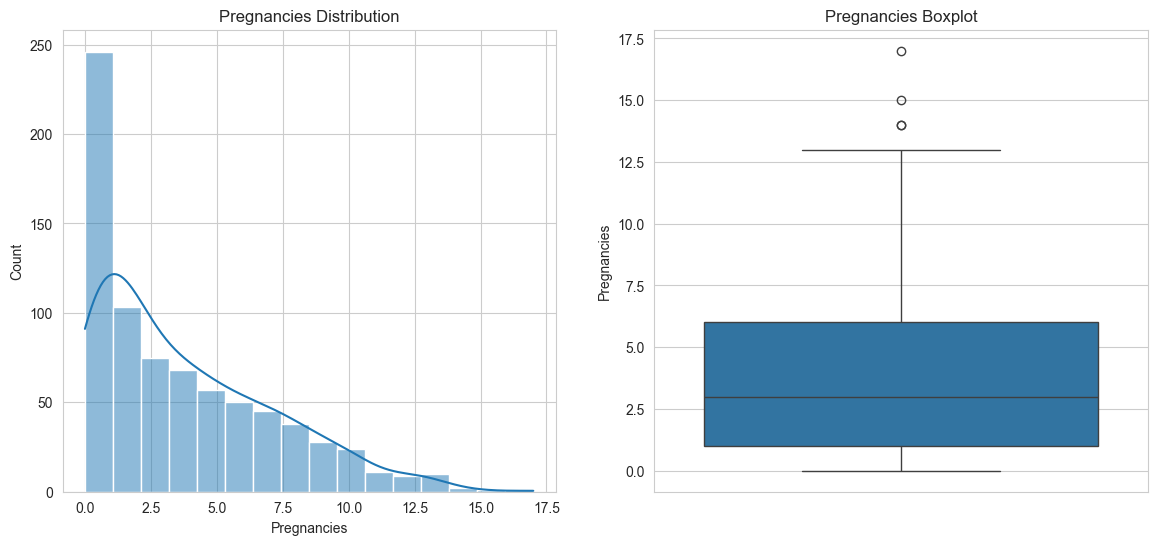

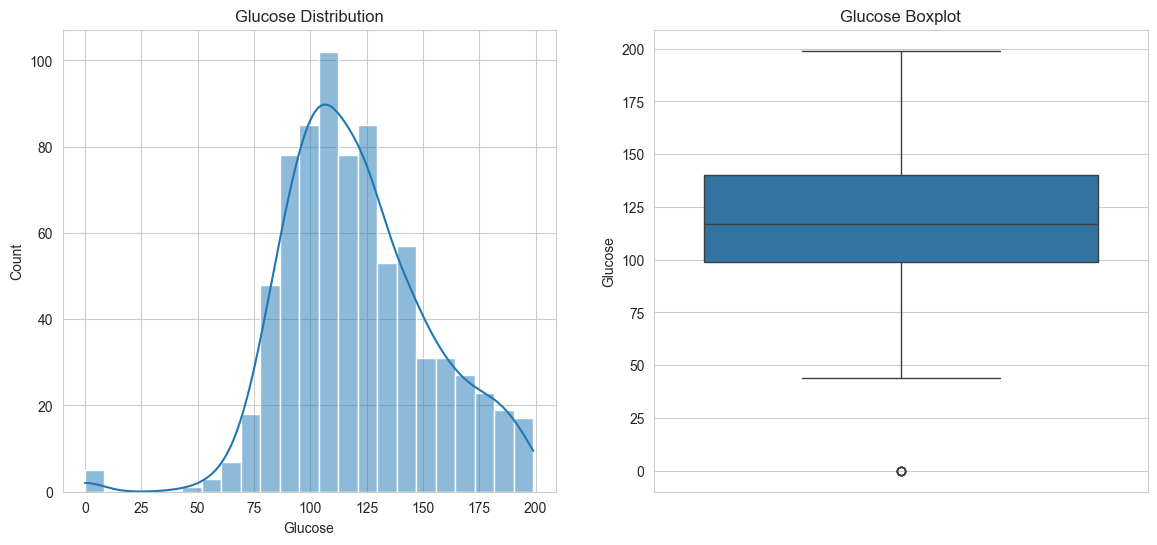

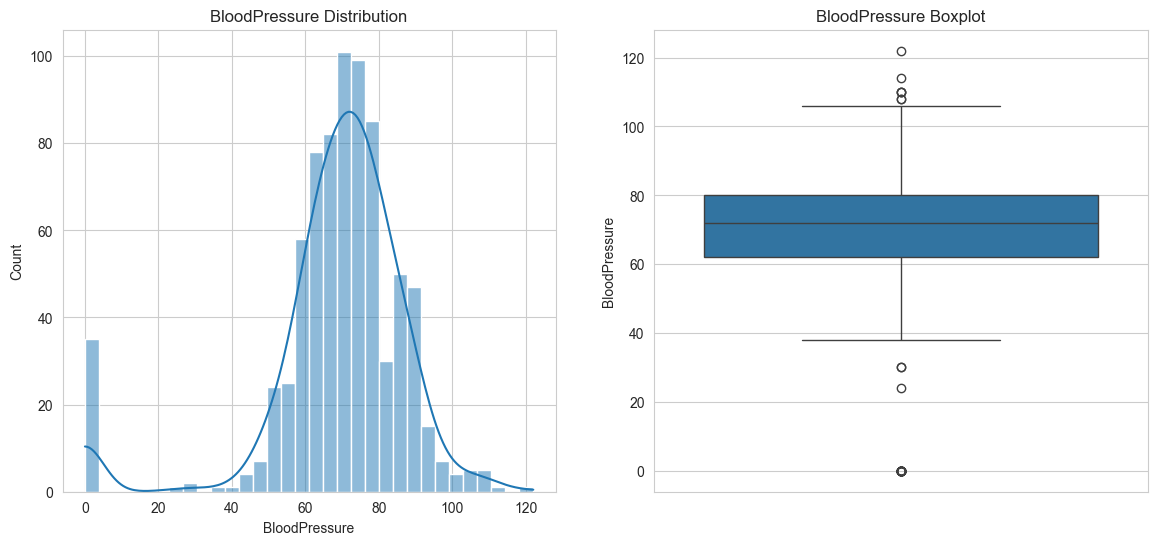

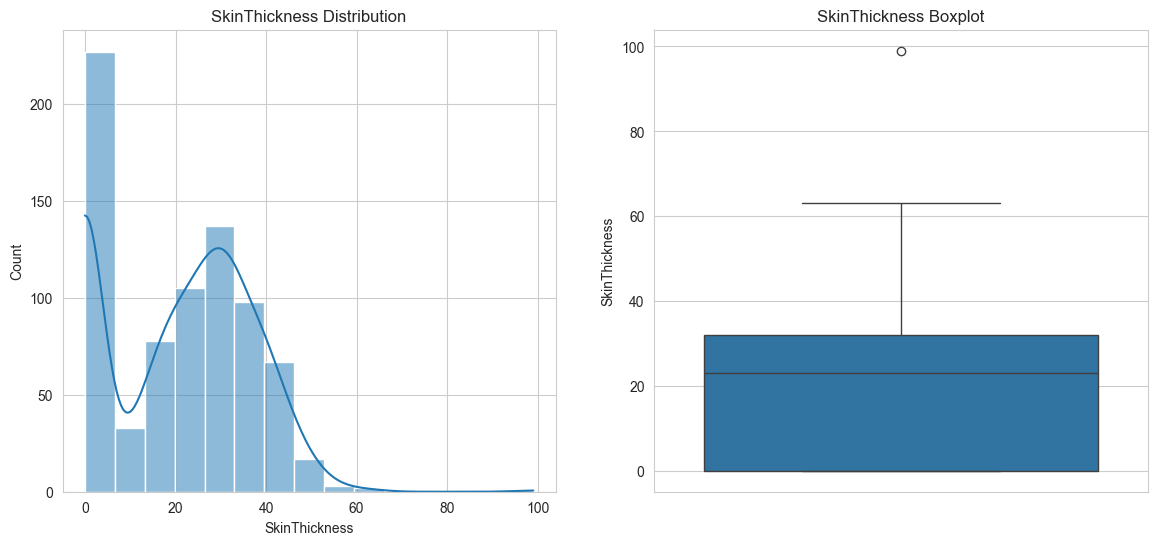

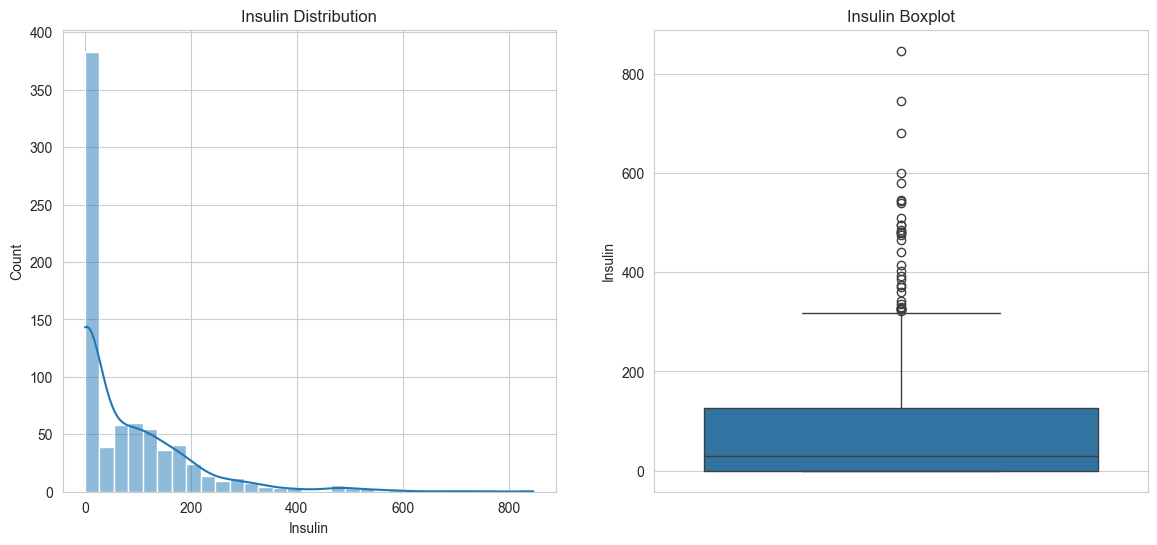

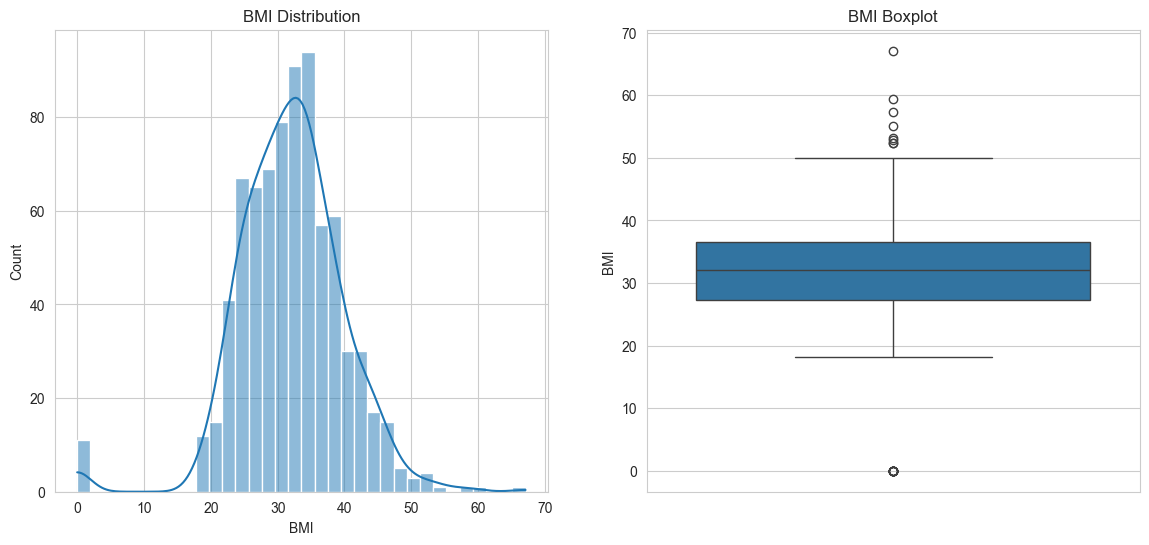

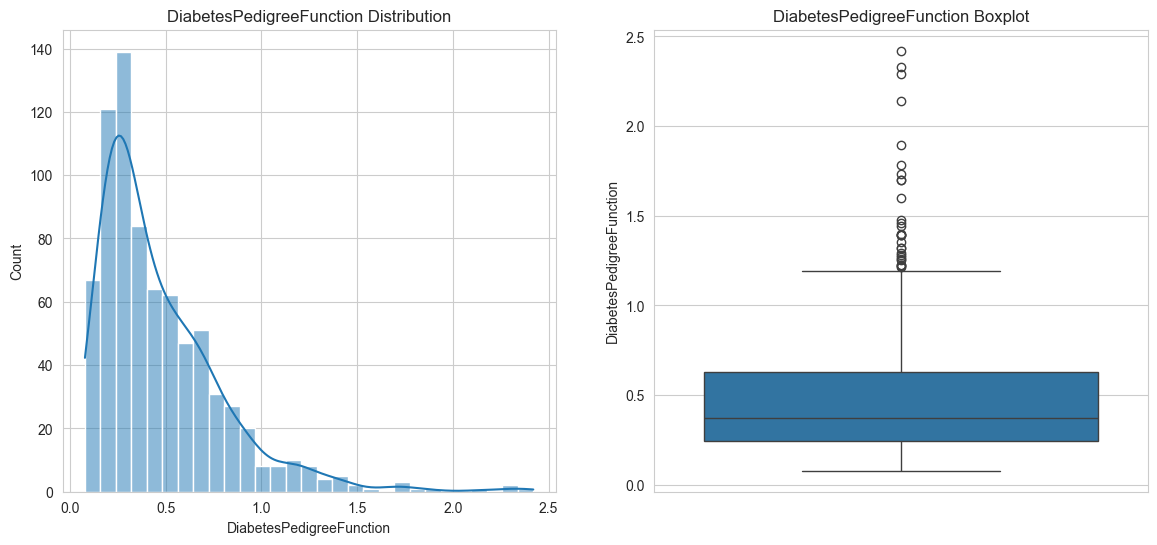

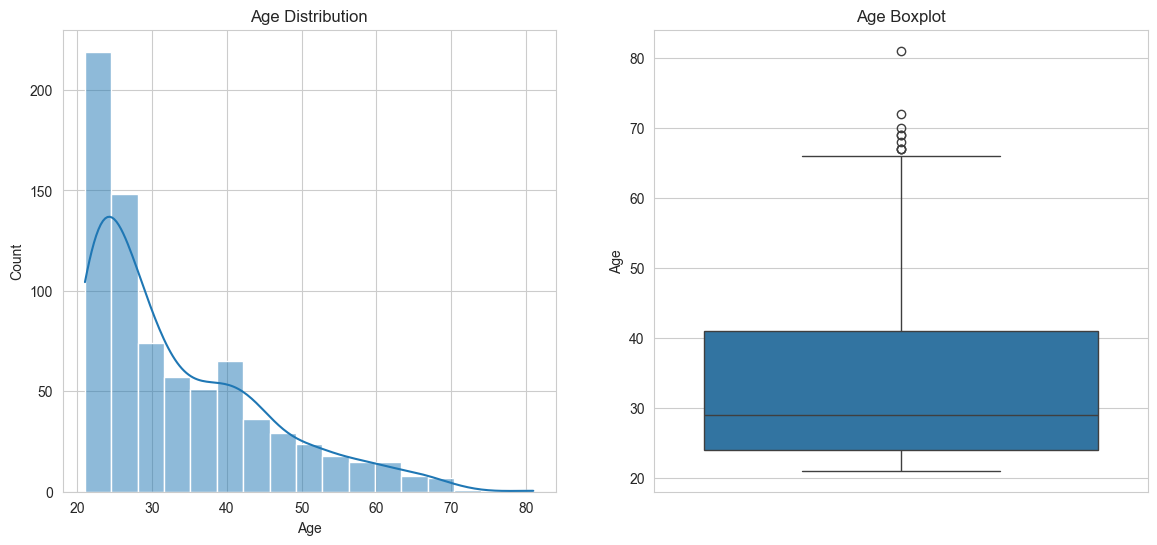

In [89]:
# Plot univariate analysis for all features
features = data.columns[:-1]
for feature in features:
    plot_univariate(data, feature)

## Comments
- The dataset contains no missing values or duplicate rows.
- The data is well-distributed across the features.
- The correlation heatmap shows that Glucose has the highest correlation with the Outcome.
- The Profile Report provides a comprehensive overview of the dataset, including the distribution of each feature and the correlation between features.
- The univariate analysis shows that the features have varying distributions, which may require normalization or scaling before modeling.
- The boxplot of Glucose levels by Outcome shows that patients diagnosed with diabetes have higher Glucose levels on average.
- The density plot of Age by Outcome shows that the distribution of Age differs between patients diagnosed with diabetes and those without.

# 3. Feature Engineering

In [90]:
# Features - Target split
X = data[['Glucose', 'BMI', 'Age']]
y = data['Outcome']

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 18.1 KB


In [92]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [93]:
# Check for features that contain zero values and count the number of zero values
def zero_values(data):
    zero_values = data.isin([0]).sum()
    return zero_values

In [94]:
# Show features that contain zero values
for feature in X.columns:
    print(f'{feature}: {zero_values(X[feature])}')

Glucose: 5
BMI: 11
Age: 0


In [95]:
data.shape

(768, 9)

In [96]:
X.shape

(768, 3)

In [97]:
# Drop rows with zero values
X = X[(X != 0).all(axis=1)]
y = y[X.index]

In [98]:
X.shape

(752, 3)

In [99]:
y.shape

(752,)

In [100]:
y.value_counts()

Outcome
0    488
1    264
Name: count, dtype: int64

In [101]:
# Check for features that contain zero values after dropping rows
for feature in X.columns:
    print(f'{feature}: {zero_values(X[feature])}')

Glucose: 0
BMI: 0
Age: 0


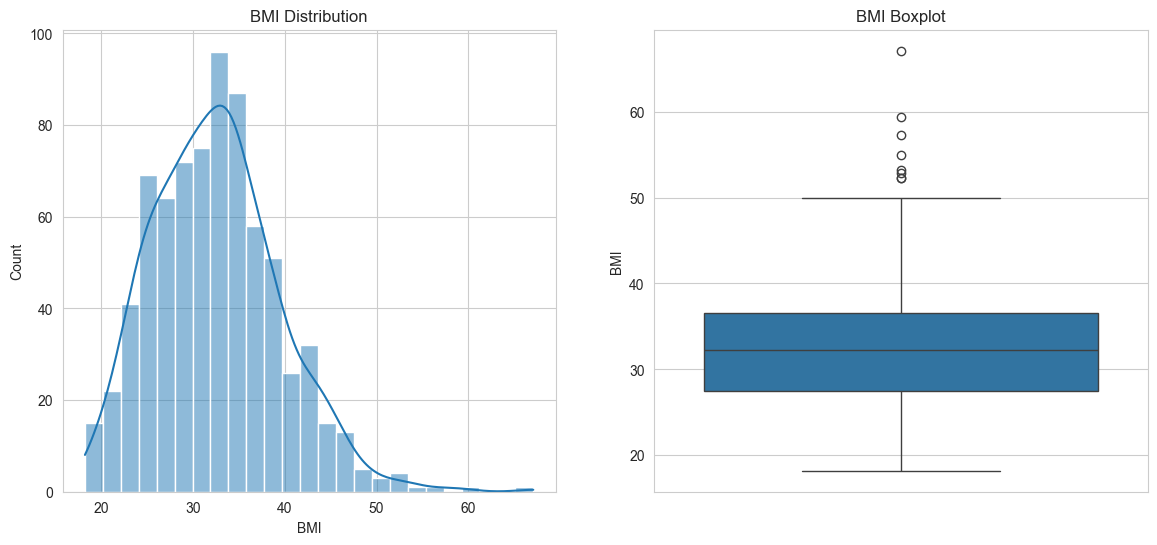

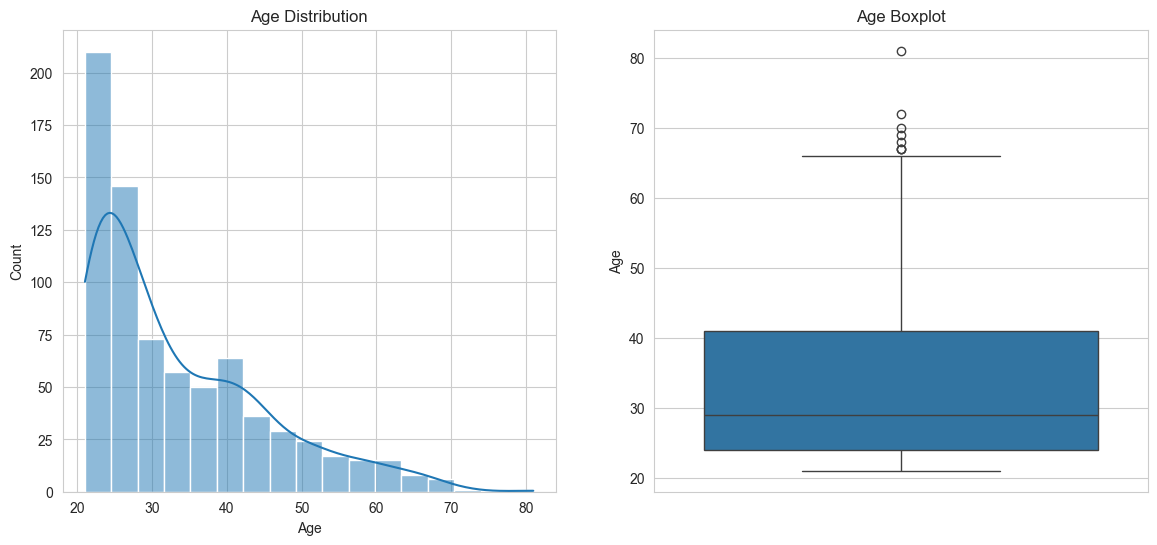

In [102]:
# Plot univariate analysis for all features after dropping rows with zero values
for feature in X.columns:
    plot_univariate(X, feature)

In [103]:
# Build pipeline for preprocessing
# Because 'BMI' and 'Age' are left skewed and contain outliers, we will apply the log transformation to normalize the data
preprocessor = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p), ['BMI', 'Age']),
    ('scaler', MinMaxScaler(), ['Glucose'])
], remainder='passthrough')

In [104]:
# Preprocess data
X_scaled = preprocessor.fit_transform(X)

In [105]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

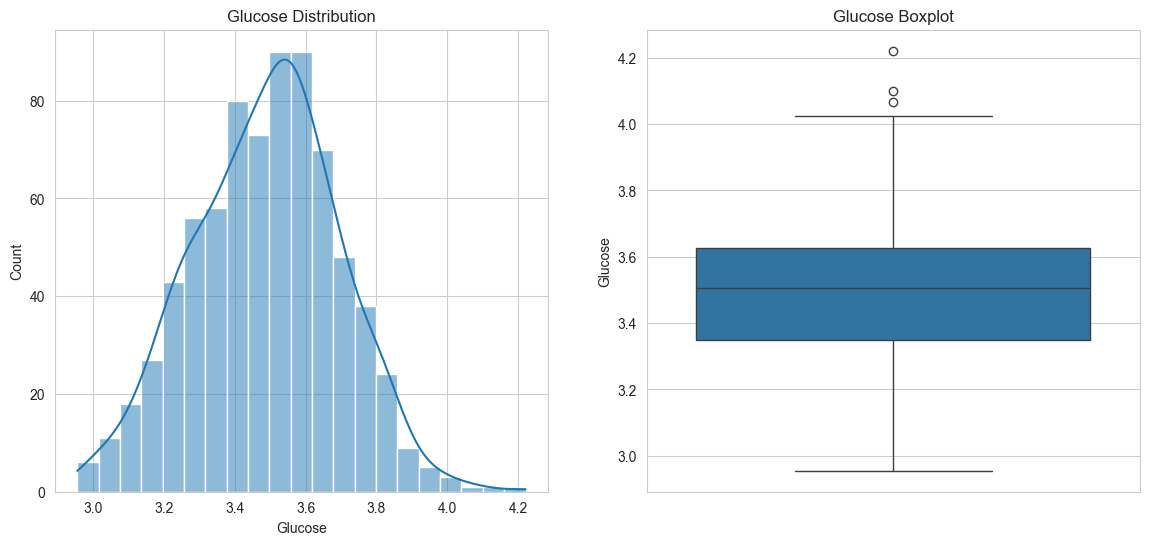

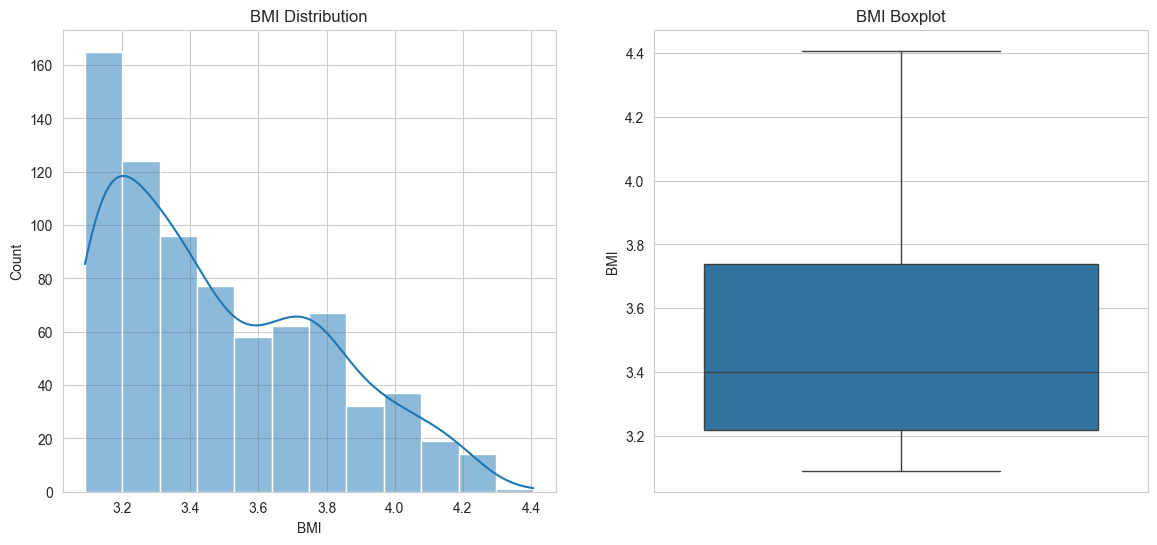

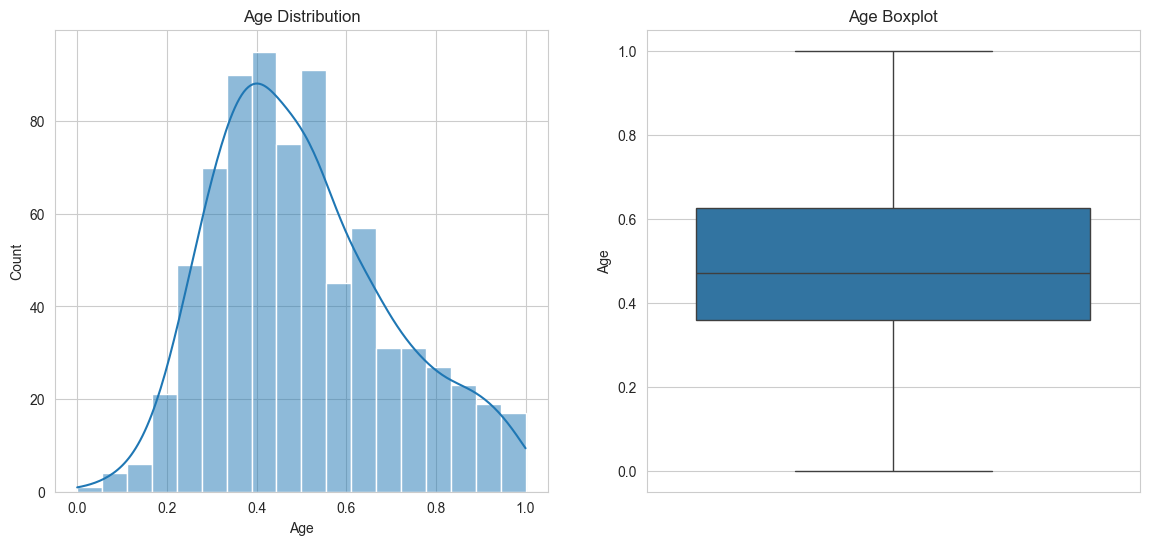

In [106]:
for feature in X_scaled.columns:
    plot_univariate(X_scaled, feature)

In [107]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Use SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [109]:
y_train_resampled.value_counts()

Outcome
0    397
1    397
Name: count, dtype: int64

# 4. Modeling

In [110]:
# Build models pipeline
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier())
    ])
}

# Parameters grid
params = {
    'Logistic Regression': {
        'classifier__C': [1, 10, 100, 1000, 10000]
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 7, 9, 11]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 400],
        'classifier__max_depth': [3, 5, 7, 9, 11]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200, 400],
        'classifier__max_depth': [3, 5, 7, 9, 11]
    }
}

In [111]:
# Hyperparameter tuning
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train_resampled, y_train_resampled, cv=5)

Search for Logistic Regression ...
Search for Decision Tree ...
Search for Random Forest ...
Search for XGBoost ...
Search is done.


In [112]:
# Evaluate models
search.evaluate_model()

results round for: Logistic Regression
results round for: Decision Tree
results round for: Random Forest
results round for: XGBoost


Estimator  \
0         Random Forest   
1         Random Forest   
2         Random Forest   
3         Random Forest   
4         Random Forest   
5         Random Forest   
6         Random Forest   
7         Random Forest   
8         Random Forest   
9         Random Forest   
10        Random Forest   
11              XGBoost   
12        Random Forest   
13              XGBoost   
14              XGBoost   
15              XGBoost   
16              XGBoost   
17              XGBoost   
18              XGBoost   
19        Random Forest   
20        Random Forest   
21        Random Forest   
22              XGBoost   
23              XGBoost   
24              XGBoost   
25              XGBoost   
26              XGBoost   
27              XGBoost   
28              XGBoost   
29              XGBoost   
30        Decision Tree   
31        Decision Tree   
32        Decision Tree   
33        Decision Tree   
34  Logistic Regression   
35  Logistic Regression   
36  Logistic Regression   
37  Logistic Regression   
38  Logistic Regression   
39        Decision Tree   

                                                            params  \
0   {'classifier__max_depth': 11, 'classifier__n_estimators': 400}   
1    {'classifier__max_depth': 9, 'classifier__n_estimators': 200}   
2    {'classifier__max_depth': 9, 'classifier__n_estimators': 400}   
3    {'classifier__max_depth': 7, 'classifier__n_estimators': 400}   
4   {'classifier__max_depth': 11, 'classifier__n_estimators': 100}   
5   {'classifier__max_depth': 11, 'classifier__n_estimators': 200}   
6    {'classifier__max_depth': 9, 'classifier__n_estimators': 100}   
7    {'classifier__max_depth': 7, 'classifier__n_estimators': 100}   
8    {'classifier__max_depth': 7, 'classifier__n_estimators': 200}   
9    {'classifier__max_depth': 5, 'classifier__n_estimators': 200}   
10   {'classifier__max_depth': 5, 'classifier__n_estimators': 400}   
11   {'classifier__max_depth': 7, 'classifier__n_estimators': 200}   
12   {'classifier__max_depth': 5, 'classifier__n_estimators': 100}   
13   {'classifier__max_depth': 9, 'classifier__n_estimators': 100}   
14   {'classifier__max_depth': 9, 'classifier__n_estimators': 400}   
15   {'classifier__max_depth': 7, 'classifier__n_estimators': 400}   
16   {'classifier__max_depth': 9, 'classifier__n_estimators': 200}   
17  {'classifier__max_depth': 11, 'classifier__n_estimators': 400}   
18   {'classifier__max_depth': 7, 'classifier__n_estimators': 100}   
19   {'classifier__max_depth': 3, 'classifier__n_estimators': 400}   
20   {'classifier__max_depth': 3, 'classifier__n_estimators': 100}   
21   {'classifier__max_depth': 3, 'classifier__n_estimators': 200}   
22  {'classifier__max_depth': 11, 'classifier__n_estimators': 100}   
23   {'classifier__max_depth': 3, 'classifier__n_estimators': 100}   
24  {'classifier__max_depth': 11, 'classifier__n_estimators': 200}   
25   {'classifier__max_depth': 5, 'classifier__n_estimators': 100}   
26   {'classifier__max_depth': 5, 'classifier__n_estimators': 200}   
27   {'classifier__max_depth': 5, 'classifier__n_estimators': 400}   
28   {'classifier__max_depth': 3, 'classifier__n_estimators': 400}   
29   {'classifier__max_depth': 3, 'classifier__n_estimators': 200}   
30                                    {'classifier__max_depth': 9}   
31                                   {'classifier__max_depth': 11}   
32                                    {'classifier__max_depth': 5}   
33                                    {'classifier__max_depth': 7}   
34                                            {'classifier__C': 1}   
35                                           {'classifier__C': 10}   
36                                        {'classifier__C': 10000}   
37                                         {'classifier__C': 1000}   
38                                          {'classifier__C': 100}   
39                                    {'classifier__max_depth': 3}   

    split0_test_score  split1_test_

In [113]:
print('highest score:', round(best_model.best_score_, 4), 
      '\n\n... with this estimator: \n\n', best_model.best_estimator_)

highest score: 0.801 

... with this estimator: 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['BMI', 'Age']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Glucose'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=11, n_estimators=400))])


# 5. Evaluation

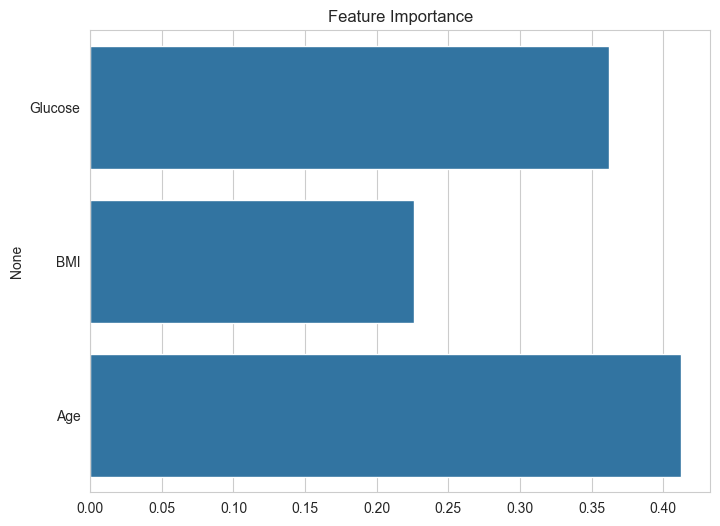

In [114]:
# Feature importance
importances = best_model.best_estimator_['classifier'].feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

In [115]:
# Make predictions
y_pred = best_model.predict(X_test)

In [116]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77        91
           1       0.64      0.85      0.73        60

    accuracy                           0.75       151
   macro avg       0.76      0.77      0.75       151
weighted avg       0.78      0.75      0.75       151



In [117]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[62, 29],
       [ 9, 51]], dtype=int64)

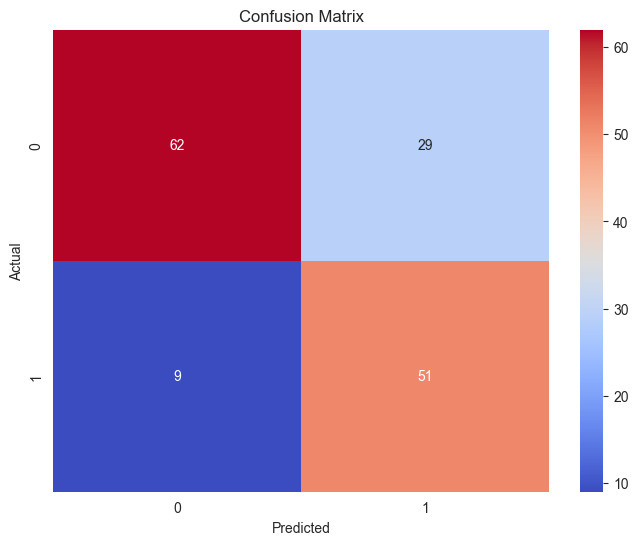

In [118]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [149]:
# What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?
person = pd.DataFrame({'Glucose': [125], 'BMI': [96/(1.78*1.78)], 'Age': [54]})

In [150]:
best_model.predict(person)

array([1], dtype=int64)

In [151]:
# predict_proba
best_model.predict_proba(person)

array([[0.16962106, 0.83037894]])

# Save the model
import joblib

joblib.dump(best_model, 'diabetes_model.pkl')

## Comments
- The dataset was preprocessed by dropping rows with zero values and applying the log transformation to normalize the data.
- The data was split into training and testing sets, and SMOTE was used to balance the target variable.
- A pipeline was built for preprocessing and modeling, and hyperparameter tuning was performed to optimize the models.
- The Random Forest model achieved the highest score of 0.8035, with an estimator of max_depth=11, n_estimators=400.
- The feature importance plot shows that Age is the most important feature for predicting diabetes.
- The model achieved an accuracy of 0.75, with a precision of 0.76 and recall of 0.77.
- The risk of a person of Age 54, length 178 cm, weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes is 0.